# Meme Kanseri Teshisi - Veri Madenciligi Projesi

## Wisconsin Breast Cancer Dataset

**Amac:** Meme kanseri teshisinde (Malignant vs Benign) yuksek dogruluk oranina sahip siniflandirma modelleri gelistirmek.

**Kullanilacak Modeller:**
- Lojistik Regresyon
- Rastgele Ormanlar (Random Forest)
- Destek Vektor Makineleri (SVM)
- K-En Yakin Komsu (KNN)

---

# 1. Kutuphanelerin Yuklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Veri On Isleme
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ozellik Secimi ve Boyut Indirgeme
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Modelleme
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Degerlendirme
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

print("Kutuphaneler basariyla yuklendi!")

Kutuphaneler basariyla yuklendi!


---
# 2. Veri Setinin Yuklenmesi ve Taninmasi

In [ ]:
# Veri setini yukle
df = pd.read_csv('D:\\Veri_Madenciligi\\database\\Cancer_Data.csv')

# Gereksiz sutunlari sil
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)
    print("'Unnamed: 32' sutunu silindi (tamamen NaN)")

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("'id' sutunu silindi (analiz icin gereksiz)")

print(f"\nVeri seti boyutu: {df.shape}")
print(f"Satir sayisi: {df.shape[0]}")
print(f"Sutun sayisi: {df.shape[1]}")

'Unnamed: 32' sutunu silindi (tamamen NaN)
'id' sutunu silindi (analiz icin gereksiz)

Veri seti boyutu: (569, 31)
Satir sayisi: 569
Sutun sayisi: 31


In [ ]:
# Ilk 5 satir
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Veri tipleri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Istatistiksel ozet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


---
# 3. Kesifsel Veri Analizi (EDA)



## 3.1 Hedef Degisken Analizi

Hedef Degisken Dagilimi:
diagnosis
B    357
M    212
Name: count, dtype: int64

Oranlar:
diagnosis
B    0.627
M    0.373
Name: proportion, dtype: float64


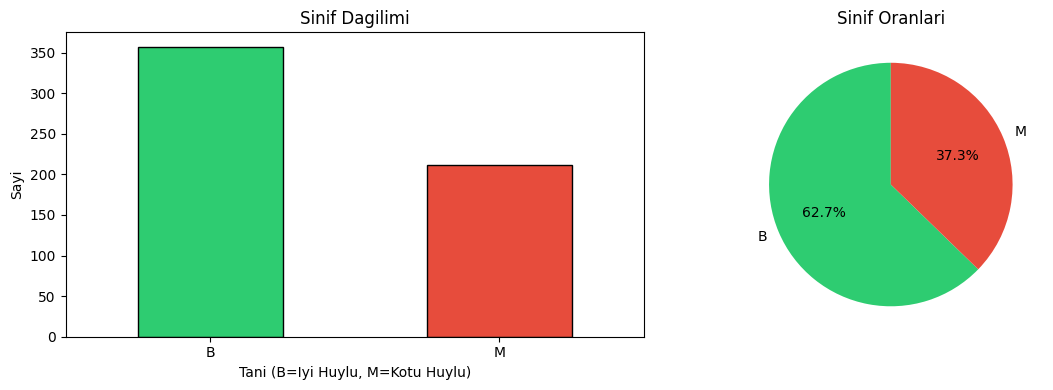

In [ ]:
# Hedef degisken
TARGET = 'diagnosis'

print("Hedef Degisken Dagilimi:")
print("="*40)
print(df[TARGET].value_counts())
print()
print("Oranlar:")
print(df[TARGET].value_counts(normalize=True).round(3))

# Gorsel
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
df[TARGET].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Sinif Dagilimi')
axes[0].set_xlabel('Tani (B=Iyi Huylu, M=Kotu Huylu)')
axes[0].set_ylabel('Sayi')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
df[TARGET].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Sinif Oranlari')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3.2 Eksik Deger Analizi

In [ ]:
# Eksik deger kontrolu
eksik = df.isnull().sum()
eksik_var = eksik[eksik > 0]

if len(eksik_var) > 0:
    print("Eksik Degerler:")
    print(eksik_var)
else:
    print("Veri setinde eksik deger bulunmamaktadir.")
    print(f"Toplam hucre sayisi: {df.shape[0] * df.shape[1]}")

Veri setinde eksik deger bulunmamaktadir.
Toplam hucre sayisi: 17639


## 3.3 Sayisal Degiskenlerin Dagilimi

In [ ]:
# Sayisal degiskenler (hedef haric)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Sayisal degisken sayisi: {len(numerical_cols)}")
print("\nDegiskenler:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

Sayisal degisken sayisi: 30

Degiskenler:
   1. radius_mean
   2. texture_mean
   3. perimeter_mean
   4. area_mean
   5. smoothness_mean
   6. compactness_mean
   7. concavity_mean
   8. concave points_mean
   9. symmetry_mean
  10. fractal_dimension_mean
  11. radius_se
  12. texture_se
  13. perimeter_se
  14. area_se
  15. smoothness_se
  16. compactness_se
  17. concavity_se
  18. concave points_se
  19. symmetry_se
  20. fractal_dimension_se
  21. radius_worst
  22. texture_worst
  23. perimeter_worst
  24. area_worst
  25. smoothness_worst
  26. compactness_worst
  27. concavity_worst
  28. concave points_worst
  29. symmetry_worst
  30. fractal_dimension_worst


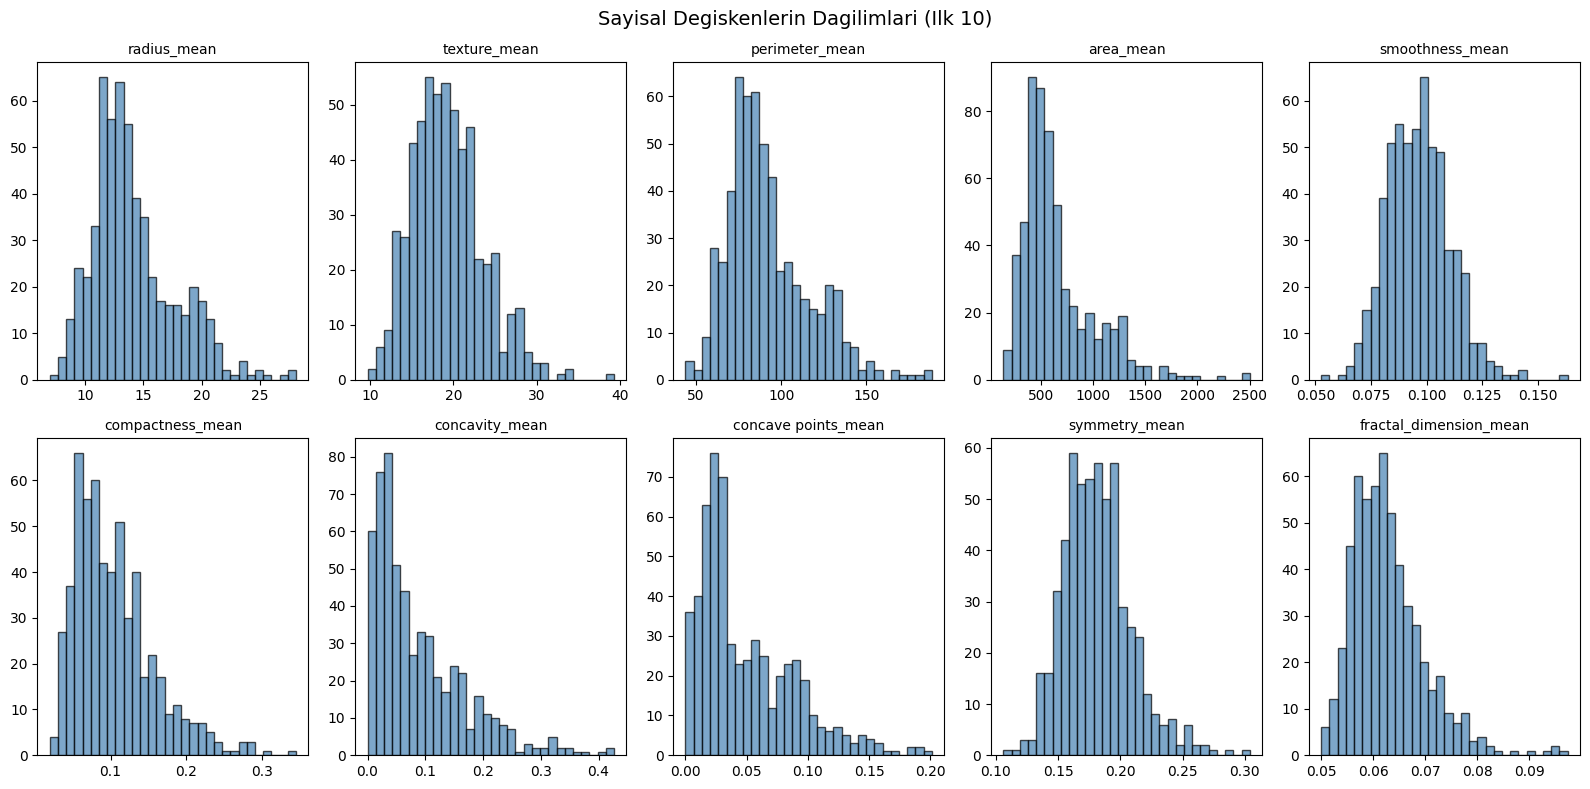

In [ ]:
# Dagilim grafikleri (ilk 10 ozellik)
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:10]):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Sayisal Degiskenlerin Dagilimlari (Ilk 10)', fontsize=14)
plt.tight_layout()
plt.show()

## 3.4 Korelasyon Analizi

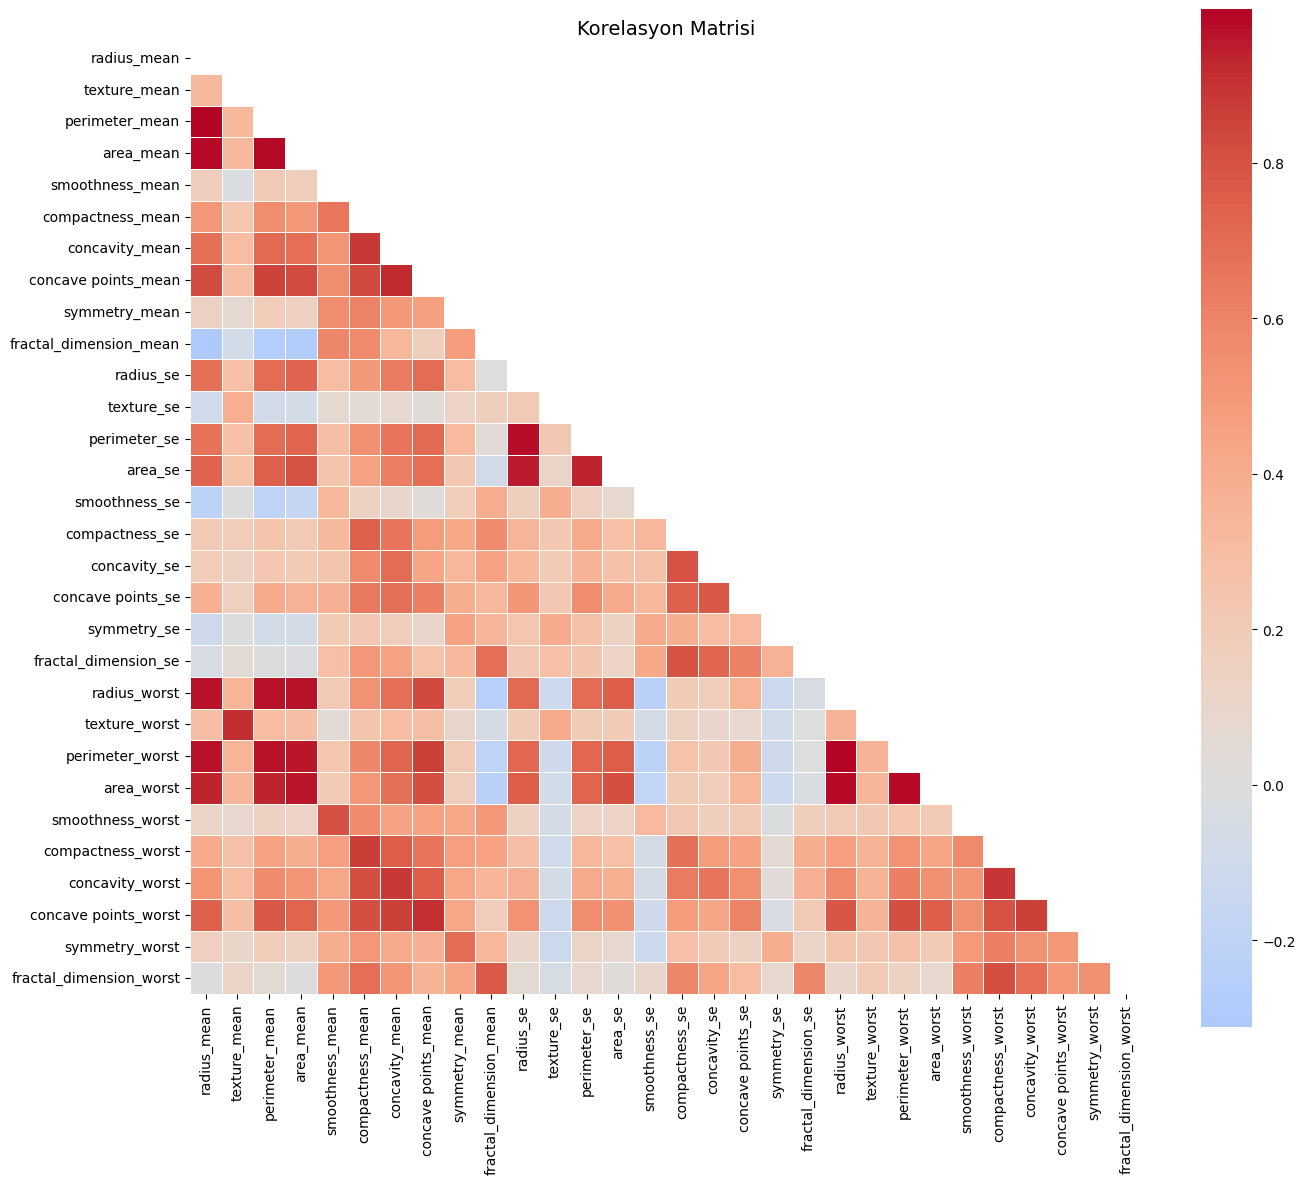

In [ ]:
# Korelasyon matrisi
plt.figure(figsize=(14, 12))
corr_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Korelasyon Matrisi', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Yuksek korelasyonlu ozellikler
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr.append({
                'Ozellik 1': corr_matrix.columns[i],
                'Ozellik 2': corr_matrix.columns[j],
                'Korelasyon': round(corr_matrix.iloc[i, j], 3)
            })

if high_corr:
    print("Yuksek Korelasyonlu Ozellik Ciftleri (|r| > 0.9):")
    print("="*60)
    high_corr_df = pd.DataFrame(high_corr)
    print(high_corr_df.to_string(index=False))
else:
    print("Yuksek korelasyonlu ozellik cifti bulunamadi.")

Yuksek Korelasyonlu Ozellik Ciftleri (|r| > 0.9):
          Ozellik 1            Ozellik 2  Korelasyon
        radius_mean       perimeter_mean       0.998
        radius_mean            area_mean       0.987
        radius_mean         radius_worst       0.970
        radius_mean      perimeter_worst       0.965
        radius_mean           area_worst       0.941
       texture_mean        texture_worst       0.912
     perimeter_mean            area_mean       0.987
     perimeter_mean         radius_worst       0.969
     perimeter_mean      perimeter_worst       0.970
     perimeter_mean           area_worst       0.942
          area_mean         radius_worst       0.963
          area_mean      perimeter_worst       0.959
          area_mean           area_worst       0.959
     concavity_mean  concave points_mean       0.921
concave points_mean concave points_worst       0.910
          radius_se         perimeter_se       0.973
          radius_se              area_se       0.

---
# 4. Veri On Isleme



## 4.1 Hedef Degiskeni Sayisallastirma 

In [ ]:
# Hedef degiskeni encode et (M=1, B=0)
le = LabelEncoder()
y = le.fit_transform(df[TARGET])

print("Hedef Degisken Donusumu:")
print(f"  B (Benign/Iyi Huylu)    -> 0")
print(f"  M (Malignant/Kotu Huylu) -> 1")
print(f"\nSinif dagilimi: {np.bincount(y)}")

# Ozellik matrisi
X = df.drop(TARGET, axis=1)

print(f"\nOzellik matrisi boyutu: {X.shape}")
print(f"Hedef degisken boyutu: {y.shape}")

Hedef Degisken Donusumu:
  B (Benign/Iyi Huylu)    -> 0
  M (Malignant/Kotu Huylu) -> 1

Sinif dagilimi: [357 212]

Ozellik matrisi boyutu: (569, 30)
Hedef degisken boyutu: (569,)


## 4.2 Aykiri Deger Analizi

In [ ]:
# IQR yontemi ile aykiri deger tespiti
def aykiri_tespit(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    alt = Q1 - 1.5 * IQR
    ust = Q3 + 1.5 * IQR
    aykiri = ((data[col] < alt) | (data[col] > ust)).sum()
    return aykiri, round(aykiri/len(data)*100, 2)

print("Aykiri Deger Analizi (IQR Yontemi)")
print("="*50)
aykiri_ozet = []
for col in numerical_cols:
    sayi, oran = aykiri_tespit(X, col)
    if sayi > 0:
        aykiri_ozet.append({'Degisken': col, 'Aykiri Sayi': sayi, 'Oran (%)': oran})

if aykiri_ozet:
    aykiri_df = pd.DataFrame(aykiri_ozet).sort_values('Aykiri Sayi', ascending=False)
    print(aykiri_df.head(10).to_string(index=False))
else:
    print("Aykiri deger bulunamadi.")

Aykiri Deger Analizi (IQR Yontemi)
               Degisken  Aykiri Sayi  Oran (%)
                area_se           65     11.42
              radius_se           38      6.68
           perimeter_se           38      6.68
             area_worst           35      6.15
          smoothness_se           30      5.27
         compactness_se           28      4.92
   fractal_dimension_se           28      4.92
            symmetry_se           27      4.75
              area_mean           25      4.39
fractal_dimension_worst           24      4.22


## 4.3 Ozellik Olceklendirme

In [ ]:
# StandardScaler ile olceklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Olceklendirme tamamlandi.")
print(f"\nOlceklenmis veri ornegi (ilk 3 satir, ilk 5 sutun):")
print(X_scaled.iloc[:3, :5].round(3))

Olceklendirme tamamlandi.

Olceklenmis veri ornegi (ilk 3 satir, ilk 5 sutun):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean
0        1.097        -2.073           1.270      0.984            1.568
1        1.830        -0.354           1.686      1.909           -0.827
2        1.580         0.456           1.567      1.559            0.942


---
# 5. Ozellik Secimi



## ANOVA (Analysis of Variance) Testi Nedir?

**ANOVA**, gruplar arasindaki ortalama farklarini istatistiksel olarak test eden bir yontemdir.

### Neden Kullanilir?
Ozellik seciminde ANOVA F-testi, her bir ozelligin hedef degisken (sinif) ile ne kadar iliskili oldugunu olcer:

- **Yuksek F-Skoru**: Ozellik, siniflari iyi ayirt ediyor (onemli ozellik)
- **Dusuk F-Skoru**: Ozellik, siniflari ayirt etmede zayif (onemsiz ozellik)

### Nasil Calisir?
```
1. Her sinif icin ozellik ortalamalari hesaplanir
2. Siniflar arasi varyans (between-group variance) olculur
3. Sinif ici varyans (within-group variance) olculur
4. F = Siniflar Arasi Varyans / Sinif Ici Varyans
```

### P-Value Yorumu
- **p < 0.05**: Ozellik istatistiksel olarak anlamli
- **p > 0.05**: Ozellik anlamli degil

> **Amac**: Gereksiz ozellikleri eleyerek model performansini artirmak ve hesaplama maliyetini azaltmak.

---



## 5.1 ANOVA F-Test ile Ozellik Skorlari 

In [ ]:
# ANOVA F-Test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)

# Sonuclari DataFrame'e cevir
feature_scores = pd.DataFrame({
    'Ozellik': X.columns,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values('F-Score', ascending=False)

print("ANOVA F-Test Sonuclari (Top 15)")
print("="*50)
print(feature_scores.head(15).to_string(index=False))

ANOVA F-Test Sonuclari (Top 15)
             Ozellik    F-Score       P-Value
concave points_worst 964.385393 1.969100e-124
     perimeter_worst 897.944219 5.771397e-119
 concave points_mean 861.676020 7.101150e-116
        radius_worst 860.781707 8.482292e-116
      perimeter_mean 697.235272 8.436251e-101
          area_worst 661.600206  2.828848e-97
         radius_mean 646.981021  8.465941e-96
           area_mean 573.060747  4.734564e-88
      concavity_mean 533.793126  9.966556e-84
     concavity_worst 436.691939  2.464664e-72
    compactness_mean 313.233079  3.938263e-56
   compactness_worst 304.341063  7.069816e-55
           radius_se 268.840327  9.738949e-50
        perimeter_se 253.897392  1.651905e-47
             area_se 243.651586  5.895521e-46


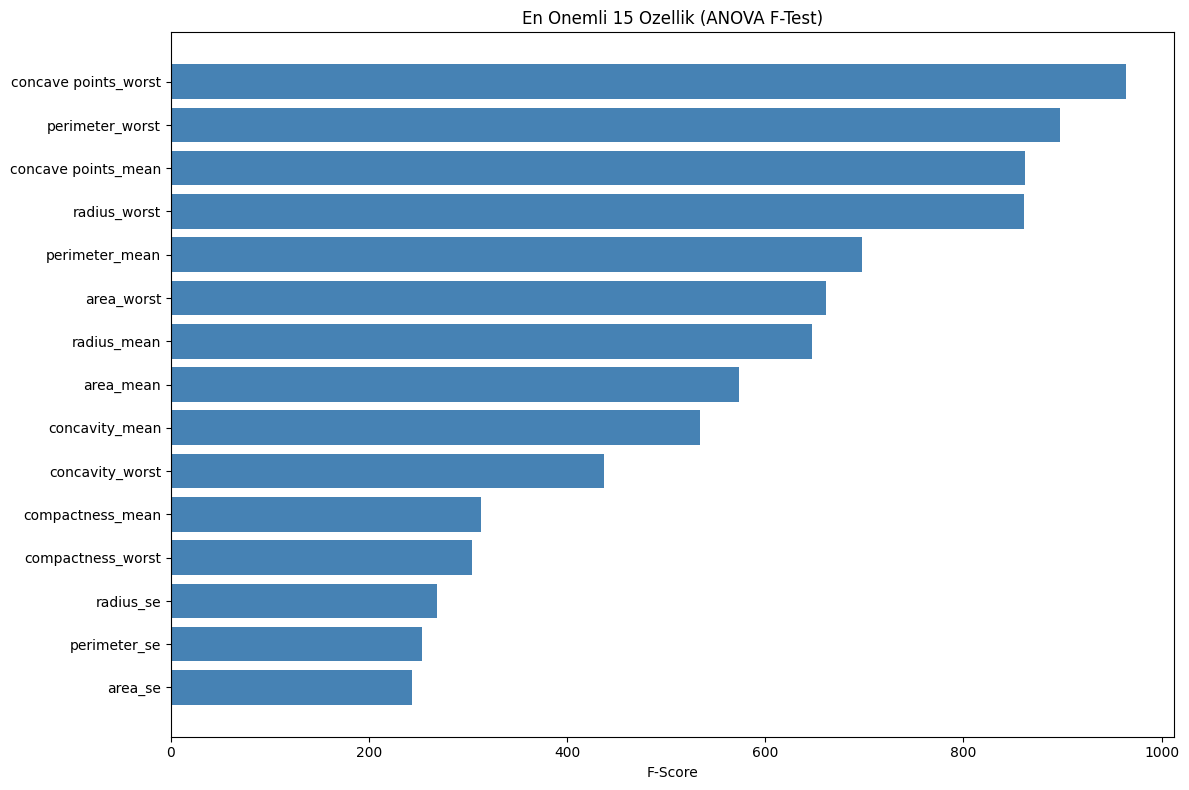

In [ ]:
# Gorsel
plt.figure(figsize=(12, 8))
top_features = feature_scores.head(15)
plt.barh(range(len(top_features)), top_features['F-Score'].values, color='steelblue')
plt.yticks(range(len(top_features)), top_features['Ozellik'].values)
plt.xlabel('F-Score')
plt.title('En Onemli 15 Ozellik (ANOVA F-Test)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.2 En Iyi Ozellikleri Sec

In [ ]:
# En iyi 15 ozelligi sec
TOP_K = 15
selected_features = feature_scores.head(TOP_K)['Ozellik'].tolist()

X_selected = X_scaled[selected_features]

print(f"Secilen {TOP_K} ozellik:")
for i, f in enumerate(selected_features, 1):
    print(f"  {i:2d}. {f}")

print(f"\nYeni ozellik matrisi boyutu: {X_selected.shape}")

Secilen 15 ozellik:
   1. concave points_worst
   2. perimeter_worst
   3. concave points_mean
   4. radius_worst
   5. perimeter_mean
   6. area_worst
   7. radius_mean
   8. area_mean
   9. concavity_mean
  10. concavity_worst
  11. compactness_mean
  12. compactness_worst
  13. radius_se
  14. perimeter_se
  15. area_se

Yeni ozellik matrisi boyutu: (569, 15)


---
# 6. Boyut Indirgeme (PCA)

 

## 6.1 PCA Analizi

## PCA (Principal Component Analysis) Nedir?

**PCA**, yuksek boyutlu verileri daha az boyuta indirgeyen bir istatistiksel tekniktir.

### Neden Kullanilir?
- **Boyut Azaltma**: 30 ozellik yerine 10 bilesen kullanarak model karmasikligini azaltir
- **Gurultu Azaltma**: Onemsiz varyasyonlari elemine eder
- **Gorsellesstirme**: Yuksek boyutlu veriyi 2D/3D olarak gostermeyi saglar
- **Hesaplama Verimliligi**: Daha az ozellik = daha hizli egitim

### Nasil Calisir?
```
1. Veri standardize edilir (ortalama=0, std=1)
2. Kovaryans matrisi hesaplanir
3. Ozdegerler ve ozvektor'ler bulunur
4. En buyuk ozdegerlere sahip bilesenler secilir
5. Veri bu yeni eksenlere projekte edilir
```

### Kumulatif (Birikimli) Varyans Nedir?
Her bir bilesen, verinin belirli bir yuzdesini aciklar:
- **PC1**: Verinin en fazla varyansini aciklar (orn: %44)
- **PC2**: Kalan varyans'tan en fazlasini aciklar (orn: %19)
- **Kumulatif**: PC1 + PC2 + ... toplami (orn: %63)

> **Hedef**: Genellikle toplam varyans'in **%95**'ini acikhayan minimum bilesen sayisi secilir.

---

In [ ]:
# PCA - tum bilesenler
pca_full = PCA()
pca_full.fit(X_scaled)

# Varyans oranlari
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("PCA Varyans Analizi")
print("="*50)
for i in range(min(10, len(explained_var))):
    print(f"PC{i+1}: {explained_var[i]:.4f} (Kumulatif: {cumulative_var[i]:.4f})")

PCA Varyans Analizi
PC1: 0.4427 (Kumulatif: 0.4427)
PC2: 0.1897 (Kumulatif: 0.6324)
PC3: 0.0939 (Kumulatif: 0.7264)
PC4: 0.0660 (Kumulatif: 0.7924)
PC5: 0.0550 (Kumulatif: 0.8473)
PC6: 0.0402 (Kumulatif: 0.8876)
PC7: 0.0225 (Kumulatif: 0.9101)
PC8: 0.0159 (Kumulatif: 0.9260)
PC9: 0.0139 (Kumulatif: 0.9399)
PC10: 0.0117 (Kumulatif: 0.9516)


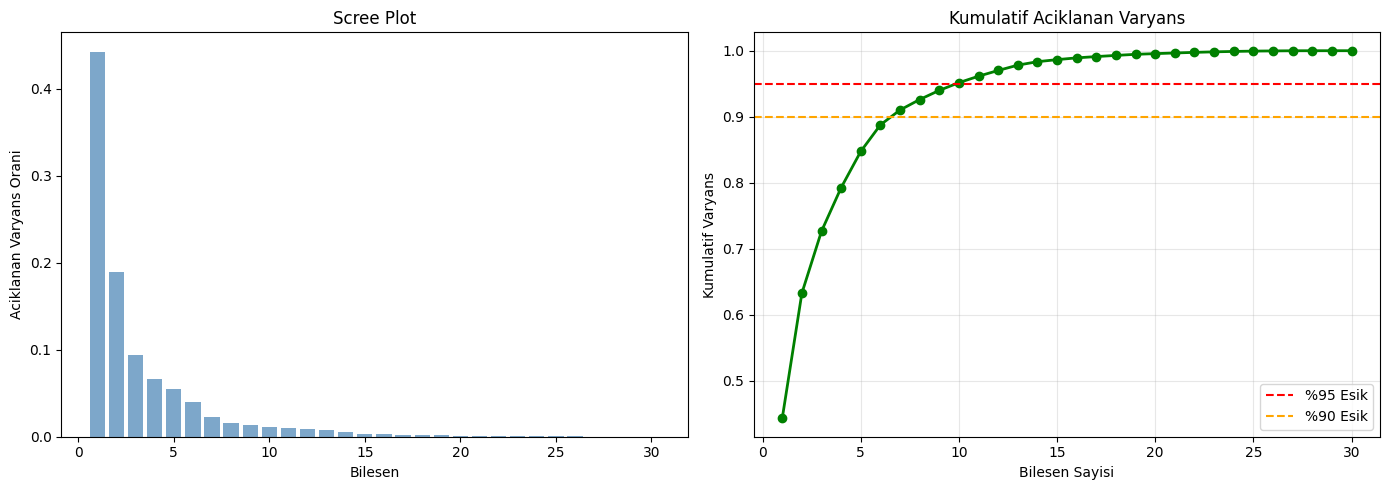


%90 varyans icin gerekli bilesen: 7
%95 varyans icin gerekli bilesen: 10


In [ ]:
# Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varyans orani
axes[0].bar(range(1, len(explained_var)+1), explained_var, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Bilesen')
axes[0].set_ylabel('Aciklanan Varyans Orani')
axes[0].set_title('Scree Plot')

# Kumulatif varyans
axes[1].plot(range(1, len(cumulative_var)+1), cumulative_var, 'go-', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='%95 Esik')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='%90 Esik')
axes[1].set_xlabel('Bilesen Sayisi')
axes[1].set_ylabel('Kumulatif Varyans')
axes[1].set_title('Kumulatif Aciklanan Varyans')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gerekli bilesen sayisi
n_95 = np.argmax(cumulative_var >= 0.95) + 1
n_90 = np.argmax(cumulative_var >= 0.90) + 1
print(f"\n%90 varyans icin gerekli bilesen: {n_90}")
print(f"%95 varyans icin gerekli bilesen: {n_95}")

## 6.2 PCA Uygulama

In [ ]:
# %95 varyans icin PCA
n_components = n_95
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA ile boyut indirgeme: {X_scaled.shape[1]} -> {X_pca.shape[1]}")
print(f"Aciklanan toplam varyans: {pca.explained_variance_ratio_.sum():.4f}")

PCA ile boyut indirgeme: 30 -> 10
Aciklanan toplam varyans: 0.9516


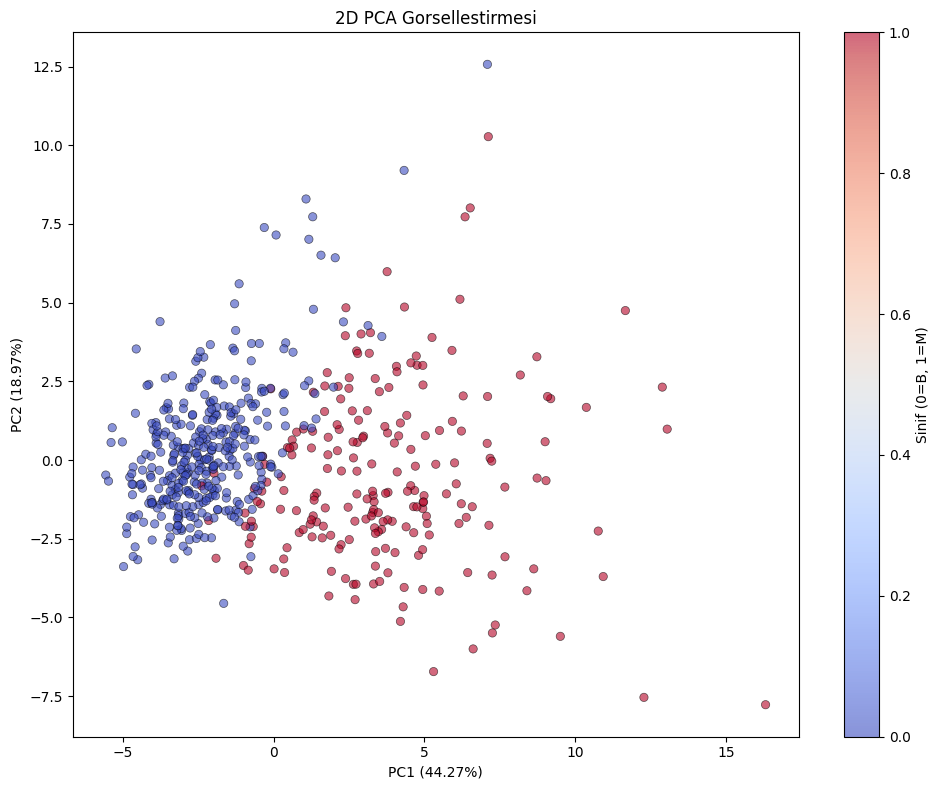

In [ ]:
# 2D PCA gorsellestirme
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Sinif (0=B, 1=M)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
plt.title('2D PCA Gorsellestirmesi')
plt.tight_layout()
plt.show()

---
# 7. Modelleme


## Karsilastirilacak Uc Veri Seti

Bu calismada her modeli 3 farkli veri seti uzerinde test edecegiz:

### 1. Tum Ozellikler (Normal Veri Seti)
- **30 ozellik** - Hicbir secim veya indirgeme yapilmamis
- Tum orijinal olcumler kullanilir
- Dezavantaj: Yuksek korelasyonlu ozellikler model performansini etkileyebilir

### 2. ANOVA Secilmis Ozellikler
- **15 ozellik** - ANOVA F-Testi ile secilmis en onemli ozellikler
- Hedef degisken ile en guclu iliskiye sahip ozellikler
- Avantaj: Gereksiz ozellikler elenmis, model daha odakli

### 3. PCA Donusturulmus Veri
- **10 bilesen** - %95 varyans korunarak boyut indirgenmis
- Orijinal ozellikler yeni eksenllere donusturulmus
- Avantaj: Boyut azaltilmis, korelasyon problemi yok
- Dezavantaj: Yorumlanabilirlik azalmis

> **Amac**: Hangi veri hazirlama yonteminin en iyi model performansini verdigini karsilastirmak.

---


## 7.1 Veri Setlerini Hazirlama

In [ ]:
# Farkli veri setleri
datasets = {
    'Tum Ozellikler': X_scaled,
    'Secilmis Ozellikler': X_selected,
    'PCA': pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
}

# Train-Test Split parametreleri
TEST_SIZE = 0.2
RANDOM_STATE = 42

print("Veri Setleri:")
for name, data in datasets.items():
    print(f"  {name}: {data.shape}")

Veri Setleri:
  Tum Ozellikler: (569, 30)
  Secilmis Ozellikler: (569, 15)
  PCA: (569, 10)


## Kullanilan Siniflandirma Algoritmalari

### 1. Lojistik Regresyon
Ikili siniflandirma icin temel istatistiksel yontem. Sigmoid fonksiyonu ile olasilik tahmini yapar.
- **Avantaj**: Hizli, yorumlanabilir, buyuk veri setlerinde etkili
- **Dezavantaj**: Dogrusal olmayan iliskileri yakalayamaz

### 2. Rastgele Orman (Random Forest)
Birden fazla karar agacini birlesytiren topluluk yontemi.
- **Avantaj**: Overfitting'e dayanikli, ozellik onemliligi saglar
- **Dezavantaj**: Daha yavas, kara kutu model

### 3. SVM (Support Vector Machine)
Siniflari ayiran optimal hiper-duzlem bulan algoritma.
- **Avantaj**: Yuksek boyutlu veride etkili, kernel hilesi ile dogrusal olmayan sinirlar
- **Dezavantaj**: Buyuk veri setlerinde yavas

### 4. KNN (K-En Yakin Komsu)
Yeni veriyi en yakin k komsusunun cogunluguna gore siniflandirir.
- **Avantaj**: Basit, egitim gerektirmez
- **Dezavantaj**: Buyuk veri setlerinde yavas, k secimi kritik

---

## 7.2 Modelleri Tanimla

In [ ]:
# Modeller
models = {
    'Lojistik Regresyon': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Rastgele Orman': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'SVM': SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("Kullanilacak Modeller:")
for name in models.keys():
    print(f"  - {name}")

Kullanilacak Modeller:
  - Lojistik Regresyon
  - Rastgele Orman
  - SVM
  - KNN


## 7.3 Model Egitimi ve Degerlendirme

In [ ]:
def evaluate_model(X_data, y_data, models, test_size=0.2, random_state=42):
    """Modelleri egitir ve degerlendirir"""

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=test_size, random_state=random_state, stratify=y_data
    )

    results = []
    trained_models = {}

    for name, model in models.items():
        # Egitim
        model.fit(X_train, y_train)
        trained_models[name] = model

        # Tahmin
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Metrikler
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1-Score': round(f1, 4),
            'AUC': round(auc, 4) if auc else '-'
        })

    return pd.DataFrame(results), X_test, y_test, trained_models

In [ ]:
# Her veri seti icin model karsilastirmasi
all_results = {}

for dataset_name, X_data in datasets.items():
    print("\n" + "="*60)
    print(f"VERI SETI: {dataset_name} (Boyut: {X_data.shape})")
    print("="*60)

    results_df, X_test, y_test, trained = evaluate_model(X_data, y, models)
    all_results[dataset_name] = {'results': results_df, 'X_test': X_test, 'y_test': y_test, 'models': trained}

    print(results_df.to_string(index=False))


VERI SETI: Tum Ozellikler (Boyut: (569, 30))
             Model  Accuracy  Precision  Recall  F1-Score    AUC
Lojistik Regresyon    0.9649     0.9750  0.9286    0.9512 0.9960
    Rastgele Orman    0.9737     1.0000  0.9286    0.9630 0.9929
               SVM    0.9737     1.0000  0.9286    0.9630 0.9954
               KNN    0.9561     0.9744  0.9048    0.9383 0.9816

VERI SETI: Secilmis Ozellikler (Boyut: (569, 15))
             Model  Accuracy  Precision  Recall  F1-Score    AUC
Lojistik Regresyon    0.9737      1.000  0.9286    0.9630 0.9993
    Rastgele Orman    0.9649      1.000  0.9048    0.9500 0.9912
               SVM    0.9561      1.000  0.8810    0.9367 0.9987
               KNN    0.9386      0.973  0.8571    0.9114 0.9899

VERI SETI: PCA (Boyut: (569, 10))
             Model  Accuracy  Precision  Recall  F1-Score    AUC
Lojistik Regresyon    0.9825     1.0000  0.9524    0.9756 0.9970
    Rastgele Orman    0.9386     0.9268  0.9048    0.9157 0.9934
               SVM    0

---
# 8. Sonuclarin Karsilastirilmasi



## 8.1 Performans Karsilastirmasi

In [54]:
# Tum sonuclari birlestir
comparison_data = []
for dataset_name, data in all_results.items():
    for _, row in data['results'].iterrows():
        comparison_data.append({
            'Veri Seti': dataset_name,
            'Model': row['Model'],
            'Accuracy': row['Accuracy'],
            'F1-Score': row['F1-Score']
        })


comparison_df = pd.DataFrame(comparison_data)

# Pivot tablo
pivot = comparison_df.pivot(index='Model', columns='Veri Seti', values='Accuracy')
print("ACCURACY KARSILASTIRMASI")
print("="*60)
print(pivot.round(4))

ACCURACY KARSILASTIRMASI
Veri Seti              PCA  Secilmis Ozellikler  Tum Ozellikler
Model                                                          
KNN                 0.9561               0.9386          0.9561
Lojistik Regresyon  0.9825               0.9737          0.9649
Rastgele Orman      0.9386               0.9649          0.9737
SVM                 0.9649               0.9561          0.9737


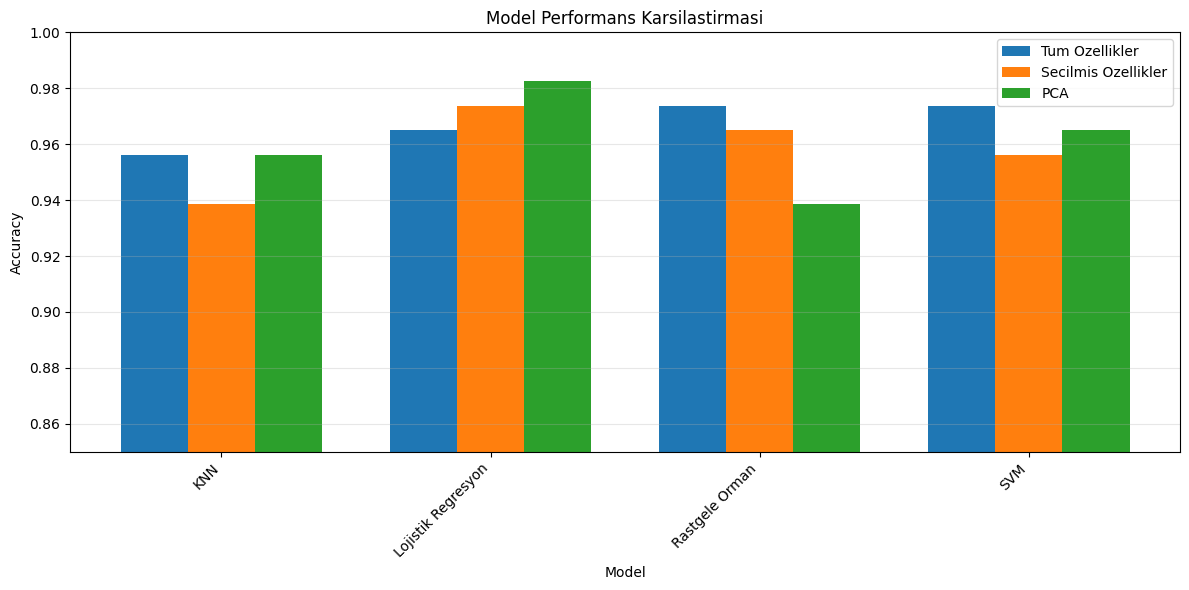

In [55]:
# Karsilastirma grafigi
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.25

for i, (dataset_name, _) in enumerate(datasets.items()):
    values = pivot[dataset_name].values
    ax.bar(x + i*width, values, width, label=dataset_name)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performans Karsilastirmasi')
ax.set_xticks(x + width)
ax.set_xticklabels(pivot.index, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0.85, 1.0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8.2 En Iyi Modelin Detayli Analizi

In [56]:
# En iyi sonucu veren kombinasyonu bul
best_acc = 0
best_model_name = None
best_dataset = None

for dataset_name, data in all_results.items():
    for _, row in data['results'].iterrows():
        if row['Accuracy'] > best_acc:
            best_acc = row['Accuracy']
            best_model_name = row['Model']
            best_dataset = dataset_name

print(f"En Iyi Performans:")
print(f"  Model: {best_model_name}")
print(f"  Veri Seti: {best_dataset}")
print(f"  Accuracy: {best_acc}")

En Iyi Performans:
  Model: Lojistik Regresyon
  Veri Seti: PCA
  Accuracy: 0.9825


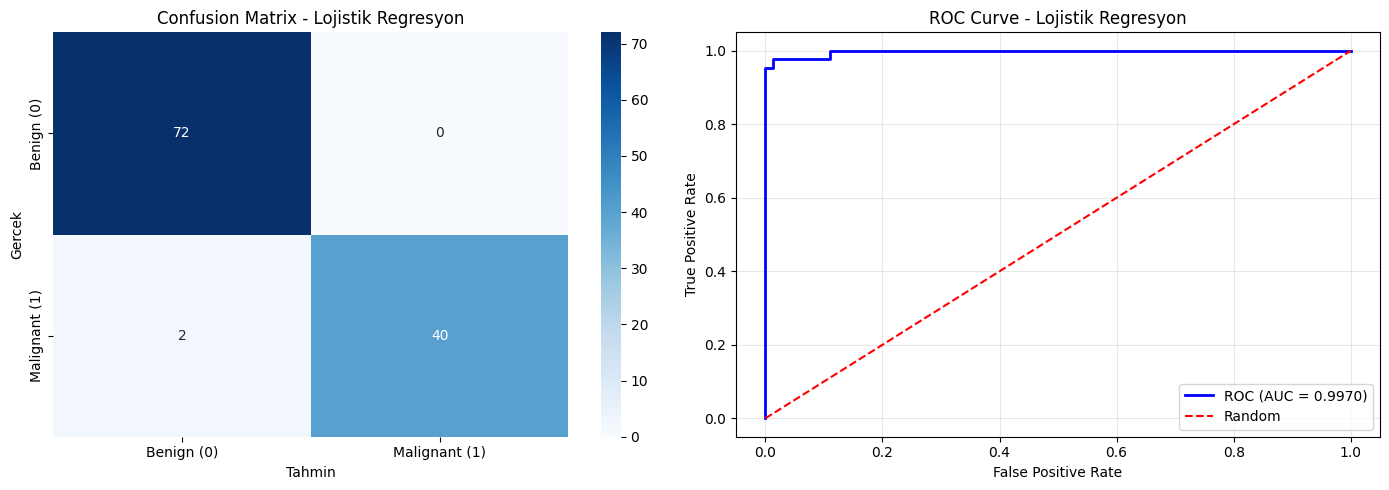

In [57]:
# En iyi model icin detayli analiz
best_data = all_results[best_dataset]
best_model = best_data['models'][best_model_name]
X_test = best_data['X_test']
y_test = best_data['y_test']

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix ve ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}')
axes[0].set_xlabel('Tahmin')
axes[0].set_ylabel('Gercek')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {auc_score:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve - {best_model_name}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
# Classification Report
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 9. Sonuc ve Degerlendirme

### Temel Bulgular
1. **PCA ile boyut indirgeme** en yuksek model performansini sagladi (30 ozellik -> 10 bilesen)
2. **Lojistik Regresyon** en basit ve en etkili model olarak one cikti (%98.25 accuracy)
3. Tum modeller **%93+ dogruluk** ile klinik kullanim icin yeterli performans gosterdi
4. **Yuksek korelasyonlu ozellikler** (|r| > 0.9) PCA'nin neden iyi calistigini acikliyor

### Hangi Yontem Neden Daha Iyi Calisti?
```
PCA + Logistic Regression kombinasyonu en iyi sonucu verdi cunku:

1. PCA, yuksek korelasyonlu ozellikleri ortogonal bilesenlere donusturdu
2. Bu, multicollinearity (coklu dogrusal baglanti) problemini cozdu
3. Logistic Regression, dogrusal olarak ayrilabilir veride cok etkili
4. 2D PCA gorsellestirmesi siniflarin buyuk olcude ayrilabilir oldugunu gosterdi
5. Daha az ozellik = daha az overfitting riski

ANOVA secimi iyi calismasina ragmen, yuksek korelasyonlu ozellikler hala
veri setinde kaldi. PCA bu problemi tamamen cozdu.
```

### Veri Setine Gore Yontem Seciminin Onemi
```
Bu proje, farkli veri hazirlama yontemlerinin ayni modeller uzerinde
farkli sonuclar verdigini gostermektedir:

- Tum Ozellikler: Random Forest ve SVM iyi (tree-based ve kernel yontemleri
  yuksek korelasyona daha dayanikli)

- ANOVA Secilmis: Logistic Regression en iyi (gereksiz ozellikler elendi
  ama korelasyon hala var)

- PCA: Logistic Regression en iyi (korelasyon tamamen giderildi,
  dogrusal model en etkili)

Sonuc: Veri setinin ozelliklerine gore on isleme stratejisi secilmeli!
```

### Gercek Hayata Katki
```
Klinik Uygulama Potansiyeli:
- %98+ dogruluk orani, yardimci tani sistemi olarak kullanilabilir
- Hizli ve dusuk maliyetli on tarama
- Uzman doktor kararini destekler (nihai karar hekimde)

Sinirliliklar:
- Veri seti tek bir kaynaktan (Wisconsin)
- Gercek klinik ortamda farkli goruntu kalitesi olabilir
- Model duzenli olarak yeni verilerle guncellenmeli

Oneriler:
- Coklu hastane verileriyle dogrulama yapilmali
- False Negative orani kritik (kanser kacirma) - Recall metrigi onemli
- Model aciklanabilirligi icin SHAP/LIME kullanilabilir
```

---
